In [72]:
import pandas as pd 
from statistics import mean
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pickle
import numpy as np

# Get the current working directory
current_working_dir = os.getcwd()


def subset_of_restructured_df(restructured_levels_per_trial_df, column_selection, selection):
    AP5_restructured_levels_per_trial_df  = restructured_levels_per_trial_df.copy()
    AP5_restructured_levels_per_trial_df = AP5_restructured_levels_per_trial_df.loc[AP5_restructured_levels_per_trial_df[column_selection] == selection]
    AP5_restructured_levels_per_trial_df = AP5_restructured_levels_per_trial_df.reset_index(drop=True)
    return AP5_restructured_levels_per_trial_df

def make_example_infusion_plot(all_TrainingLevels):
    
    trials_per_session= []
    for i in range(len(all_TrainingLevels)):
        trials_per_session = trials_per_session + [len(all_sessions_t_levels[i])]
    cum_trials_per_session = np.cumsum(trials_per_session)

    #manually define sessions when infusions were done: 
    AP5_sessions = [5, 10]
    Saline_sessions = [8, 12]

    TrainLevelsAll = sum(all_TrainingLevels, [])
    fnt = 24
    #if CurrentAnimal == 'EJT185':
    fig = plt.figure(figsize=(18, 10))
    ax = plt.subplot2grid((5, 3), (1, 0), rowspan =4,colspan =3)   
    ax.set_xlabel('Trials', fontsize = fnt, color = "black")
    ax.plot(TrainLevelsAll,linewidth = 1,color = 'black')
    ax.set_ylabel('Training level',fontsize =fnt, color = 'black')
    ax.tick_params(axis='x', labelsize=fnt)
    ax.tick_params(axis='y', labelsize=fnt)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_visible(True)
    ax.spines.bottom.set_visible(True)
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    #ax.set_title(CurrentAnimal)
    ymax = max(TrainLevelsAll)
    ymin = min(TrainLevelsAll)

    mylightorange = "#BF6D73"# "#fff6f2"#"#fff3ea" #"#f7e3d8" #"#e8ad8b" ##f69d6b" #"#fdbf6f"
    mydarkorange =  "#BF6D73"#"#ffdac4" #"#f9d6c0" #"#f7e3d8" #'#fcd2b8'#"#efc8b2" #"#dd8452" #"#ff7f00" #

    mylightblue = "#364D9C"#"#e4f0f7"
    mydarkblue =  "#364D9C" #"#2b7bba" #"#0000FF" #

    if CurrentAnimal == 'EJT185':
        ax.set_xlim(1, 3000)
        ax.set_ylim(0.5, 52)
    #         for n_trials in cum_trials_per_session:
            #print(n_trials)
            #ax.vlines(n_trials, ymin, ymax, color = 'grey',alpha = 0.3,zorder=10) 
            #AP5
            #ax.axvspan(532, 693, ymin = 0.01, ymax = 0.1, color= mylightorange, alpha=0.1)
        ax.axvspan(693, 782, color= mylightorange, alpha=0.3)
        #ax.axvspan(1351, 1551, ymin = 0.01, ymax = 0.1, color= mylightorange, alpha=0.1) #added 10 to start
        ax.axvspan(1551, 1718, color= mylightorange, alpha=0.3) #subtracted 10 from end

        #Saline
        #ax.axvspan(931, 1106, ymin = 0.01, ymax = 0.1, color= mylightblue, alpha=0.1)
        ax.axvspan(1106, 1341, color= mylightblue, alpha=0.3) #subtracted 10 from end
        #ax.axvspan(1728, 1946, ymin = 0.01, ymax = 0.1, color= mylightblue, alpha=0.1) #added 10 to start
        ax.axvspan(1946, 2247, color= mylightblue, alpha=0.3)


    else: 
        ax.set_xlim(1, 12000)
        for n_trials in cum_trials_per_session:
            ax.vlines(n_trials, ymin, ymax, color = 'grey',alpha = 0.3,zorder=10) 

    ax.set_yticks([1, 10, 20, 30, 40 ,50])
    #     ax.yaxis.set_major_locator(mticker.FixedLocator([1, 10, 20, 30, 40 ,50]))
    #     ax.xaxis.set_major_locator(plt.MultipleLocator(500))
    #     ax.axvspan(2615, 2675, ymin = 0.465, ymax = 0.515, color= mydarkorange)
    #     ax.axvspan(2715, 2775, ymin = 0.465, ymax = 0.515, color= mydarkblue)
    ax.text(2530, 28, "Test session", color = "black", fontsize = fnt)
    ax.text(2460, 22, "Day after infusion", color = "black", fontsize = fnt)
    #ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.text(0.059, 0.272, "Early", color = "black", transform=plt.gcf().transFigure, fontsize = fnt, rotation = 90)
    ax.add_patch(plt.Rectangle((-275,12), 100, 8,facecolor='gainsboro',clip_on=False,linewidth = 0))
    ax.text(0.059, 0.40, "Middle", color = "black", transform=plt.gcf().transFigure, fontsize = fnt, rotation = 90)
    ax.add_patch(plt.Rectangle((-275,20.5), 100, 14,facecolor='gainsboro',clip_on=False,linewidth = 0))
    ax.text(0.059, 0.59, "Late", color = "black", transform=plt.gcf().transFigure, fontsize = fnt, rotation = 90)
    ax.add_patch(plt.Rectangle((-275,35), 100, 15,facecolor='gainsboro',clip_on=False,linewidth = 0))
    ax.text(0.0305, 0.11, 'Naive', color = "gray",  transform=plt.gcf().transFigure, fontsize = fnt)
    ax.text(0.0305, 0.71, 'Expert', color = "gray",  transform=plt.gcf().transFigure, fontsize = fnt)
    arrow_pos = -0.1
    ax.annotate('', xy = (arrow_pos, 0.97), xycoords='axes fraction', xytext=(arrow_pos, 0.04), 
            arrowprops=dict(arrowstyle="->, head_width=0.3, head_length =0.7", color='gray', linewidth = 2))

    for session in Saline_sessions:
        #if CurrentAnimal == 'EJT185':
        infusion_trial = cum_trials_per_session[session - 1]
        infusion_level = all_TrainingLevels[session - 1][-1]
        plt.arrow(infusion_trial, infusion_level + 8, 0, -7.8, length_includes_head = True, width = 13, head_width=40, 
                  head_length = 1.1, color = "#1f78b4") #"#2b7bba")
        ax.text(infusion_trial - 80, infusion_level + 8.5, 'Saline', color = "#1f78b4", fontsize = fnt)


    for infusion_number, session in enumerate(AP5_sessions):
    #         if CurrentAnimal == 'EJT185':
        infusion_trial = cum_trials_per_session[session-1] #i.e. the cumulative number of trials just before the infusion
        infusion_level = all_TrainingLevels[session -1][-1]
        plt.arrow(infusion_trial, infusion_level +8, 0, -7.8, length_includes_head = True, width = 13, head_width=40, 
                  head_length = 1.1, color = "#dd8452")# "darkorange")
        ax.text(infusion_trial - 60, infusion_level + 8.5, 'AP5', color = "#dd8452", fontsize = fnt)
                
    return

In [75]:
np.save('example_mouse_tlevel_data.npy',all_TrainingLevels)

C:\Users\Emmett\anaconda3\lib\site-packages\numpy\lib\npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


figure 1b

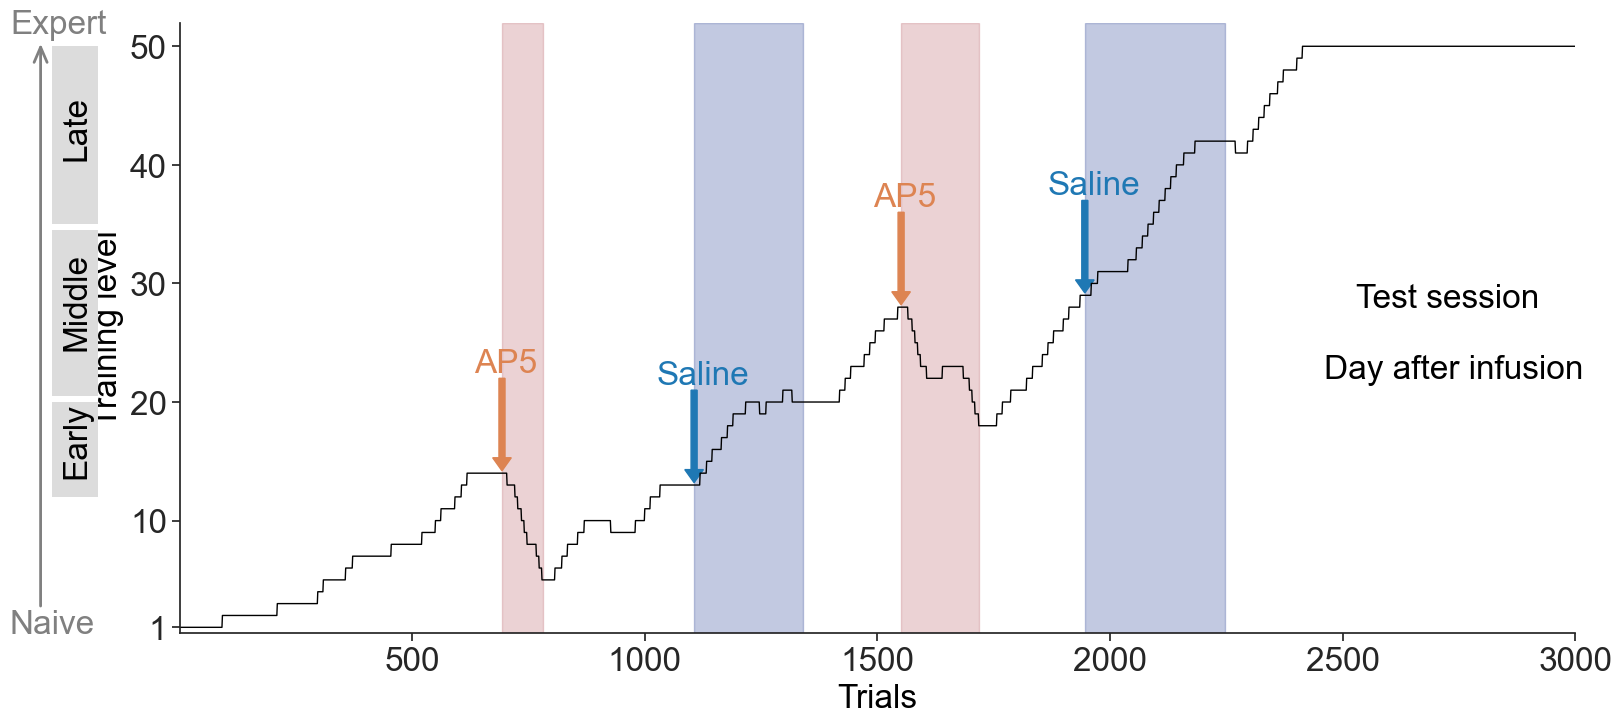

In [79]:
#Best learning curve with arrows for different infusions 

            
#load in example mouse EJT185
all_TrainingLevels = np.load(current_working_dir + '\data\example_mouse_tlevel_data.npy',allow_pickle=True)

# call function to make plot
make_example_infusion_plot(all_TrainingLevels)



figure 1c

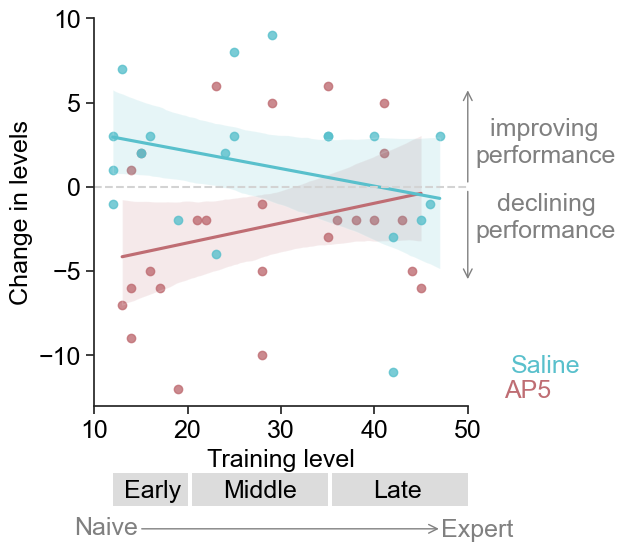

In [26]:
# Read CSV

df = pd.read_csv(glob.glob(current_working_dir + '*\data\infusions_df.csv')[0])

#Change in levels v start level (all animals pooled)

darkorange =  "#BF6D73" 
darkblue =  "#59C0CC"#"#1f78b4" #"#2b7bba"
my_palette = [darkorange, darkblue] 
my_palette = sns.set_palette(sns.color_palette(my_palette))

ax = sns.lmplot(x="Start level", y="Change in levels", hue="Infusion",data=df, palette = my_palette, 
              height=5, aspect=1)

sns.set_theme(style="white", font_scale = 1.3)
sns.despine()
fnt = 18
plt.xlabel("Training level", c = "black", fontsize = fnt) #"Culmen Length (mm)",fontweight ='bold', size=14)
plt.xticks([10, 20,30,40, 50], c = "black", fontsize = fnt)
plt.ylabel("Change in levels", c = "black", fontsize = fnt)
plt.yticks(c = "black", fontsize = fnt)
#plt.ylim([-15, 10]
sns.set_style('ticks')  # white style with tick marks
    
plt.text(0.2385, -0.02, "Early", transform=plt.gcf().transFigure, fontsize = fnt, c = "black") 
plt.gca().add_patch(plt.Rectangle((12, -19), 8, 2, facecolor='gainsboro',clip_on=False,linewidth = 0))
plt.text(0.398, -0.02, "Middle", transform=plt.gcf().transFigure, fontsize = fnt, c = "black")
plt.gca().add_patch(plt.Rectangle((20.5,-19), 14.5, 2, facecolor='gainsboro',clip_on=False,linewidth = 0))
plt.text(0.637, -0.02, "Late", transform=plt.gcf().transFigure, fontsize = fnt, c = "black")  #color = "black",
plt.gca().add_patch(plt.Rectangle((35.5,-19),14.5, 2,facecolor='gainsboro',clip_on=False,linewidth = 0))
plt.text(0.16, -0.093, 'Naive', color = "gray",  transform=plt.gcf().transFigure, fontsize = fnt)
plt.text(0.745, -0.097, 'Expert', color = "gray",  transform=plt.gcf().transFigure, fontsize = fnt)
arrow_pos = -0.315
plt.annotate('', xy = (0.93, arrow_pos), xycoords='axes fraction', xytext=(0.12, arrow_pos), 
            arrowprops=dict(arrowstyle="->", color='gray'))

plt.text(0.845, 0.18, 'AP5', color = darkorange, transform=plt.gcf().transFigure, fontsize = fnt)
plt.text(0.857, 0.23, 'Saline', color = darkblue, transform=plt.gcf().transFigure, fontsize = fnt)
plt.axhline(y=0, ls='--', c='lightgrey') 
plt.text(0.8, 0.65, '  improving \nperformance', color = "grey", transform=plt.gcf().transFigure, fontsize = fnt)
plt.text(0.8, 0.5, '   declining \nperformance', color = "grey", transform=plt.gcf().transFigure, fontsize = fnt)
arrow_pos = 1
plt.annotate('', xy = (arrow_pos, 0.82), xycoords='axes fraction', xytext=(arrow_pos, 0.57), 
            arrowprops=dict(arrowstyle="->", color='grey'))
plt.annotate('', xy = (arrow_pos, 0.32), xycoords='axes fraction', xytext=(arrow_pos, 0.56), 
            arrowprops=dict(arrowstyle="->", color='grey'))
ax._legend.remove()

plt.show()

In [40]:
#stats
df_renamed = df.rename(columns={'Change in levels': 'level_change', 'Start level': 'start_level'})
import statsmodels.formula.api as smf
results = smf.ols(data=df_renamed, formula='level_change ~ C(Infusion) * start_level').fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           level_change   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     3.464
Date:                Fri, 28 Jun 2024   Prob (F-statistic):             0.0247
Time:                        19:18:34   Log-Likelihood:                -131.06
No. Observations:                  45   AIC:                             270.1
Df Residuals:                      41   BIC:                             277.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -5.6912      2.575     -2.210      0.033     -10.892      -0.491
C(Infusion)[T.Saline]                 9.8915      3.639      2.718      0.010       2.542      17.241
start_level                           0.1177      0.086      1.371      0.178      -0.056       0.291
C(Infusion)[T.Saline]:start_level    -0.2219      0.120     -1.843      0.073      -0.465       0.021
==============================================================================
Omnibus:                        0.012   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.151
Skew:                          -0.031   Prob(JB):                        0.927
Kurtosis:                       2.723   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Figure 1d

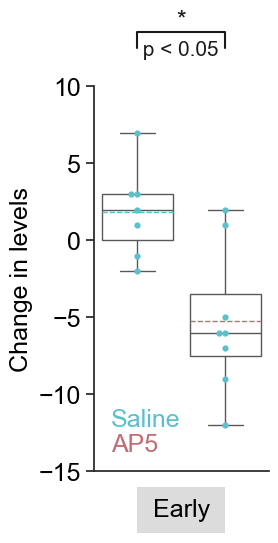

In [28]:
early_label = 'early (levels 12-' + str(20) + ')'
early_df = df[df["Training stage"] == early_label]

darkorange =  "#BF6D73" #"#ff7f00" #
darkblue =  "#59C0CC"# "#2b7bba"
my_cmap = sns.set_palette(sns.color_palette([darkblue, darkorange]))

plt.figure(figsize=(2.25, 5))
ax = sns.boxplot(x="Infusion", y="Change in levels", linewidth=1, saturation = 1, data=early_df, 
                 order=["Saline", "AP5"], showfliers=False, palette = my_cmap,
                 medianprops={"linewidth": 1, "solid_capstyle": "butt"},boxprops = {"facecolor": 'none'}) 

for i,box in enumerate(ax.artists):
    if i == 0:
        box.set_edgecolor(darkblue)
    elif i == 1: 
        box.set_edgecolor(darkorange)
    #iterate over whiskers and median lines
    for j in range((5*i),5*(i+1)):
        if i == 0:
            ax.lines[j].set_color(darkblue)
        elif i == 1:
            ax.lines[j].set_color(darkorange)

ax = sns.swarmplot(x="Infusion", y="Change in levels", order=["Saline", "AP5"], #edgecolor = ".26", 
                   data=early_df, dodge = True, size=4.5, palette = my_cmap)  #color=".26") #


column_selection = "Infusion"
selection = "Saline"
df_temp = subset_of_restructured_df(early_df, column_selection, selection)
mean_days_to_min = mean(list(df_temp["Change in levels"]))
ax.hlines(y=mean_days_to_min, xmin=-0.4, xmax=0.4, linewidth=1, color=darkblue, linestyle = "dashed")

column_selection = "Infusion"
selection = "AP5"
df_temp = subset_of_restructured_df(early_df, column_selection, selection)
mean_days_to_min = mean(list(df_temp["Change in levels"]))
ax.hlines(y=mean_days_to_min, xmin=0.6, xmax=1.4, linewidth=1, color=darkorange, linestyle = "dashed")


# statistical annotation
x1, x2 = 0, 1   # columns
y, h, col = 12.5, 1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col, clip_on = False)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, clip_on = False, fontsize = fnt)
plt.text((x1+x2)*.465, y-(h*+0.75), " p < 0.05", ha='center', va='bottom', color=col, clip_on = False, fontsize = fnt-3)

#ax.hlines(y=-19.5, xmin=0.6, xmax=1.4, linewidth=1, color="black", linestyle = "dashed", clip_on = False)
#ax.hlines(y=-19.5, xmin=-0.4, xmax=0.4, linewidth=1, color="black", clip_on = False)

ax.yaxis.tick_left()

sns.set_theme(style="white", font_scale = 1.3)
fnt = 18
plt.ylabel("Change in levels", c = "black", fontsize = fnt) #"Culmen Length (mm)",fontweight ='bold', size=14)
plt.yticks(c = "black", fontsize = fnt)
plt.xlabel("")
plt.xticks([])
plt.legend([],[], frameon=False)
plt.ylim([-15, 10])
plt.text(0.2, 0.2, 'Saline', color = darkblue, transform=plt.gcf().transFigure, fontsize = fnt) 
plt.text(0.2, 0.15, 'AP5', color = darkorange, transform=plt.gcf().transFigure, fontsize = fnt) 
ax.text(0.385, 0.02, "Early", color = "black", transform=plt.gcf().transFigure, fontsize = fnt)
ax.add_patch(plt.Rectangle((0,-19), 1, 3,facecolor='gainsboro',clip_on=False,linewidth = 0))
sns.despine()

plt.show()

In [38]:
## stats

stats_data = early_df
means = stats_data.groupby('Infusion').mean()
sdevs = stats_data.groupby('Infusion').std()
print("means",means)
print("\nsdevs:", sdevs)

values_y_axis = 'Change in levels'
saline_group = stats_data[stats_data['Infusion']=='Saline']
saline_group = saline_group[values_y_axis]
AP5_group = stats_data[stats_data['Infusion']=='AP5']
AP5_group = AP5_group[values_y_axis]

#Shapiro-Wilk test for nromality 
s_SW = stats.shapiro(saline_group) #W value, p value
a_SW = stats.shapiro(AP5_group)
print('\nSW test Saline group:',s_SW)
print('SW test AP5 group:',a_SW)
print("\na p value <0.05 shows non-normality i.e. oberservations in the group are normally distributed")

print(stats.ttest_ind(saline_group,AP5_group))

means           Unnamed: 0  Change in levels  Change in levels day before  \
Infusion                                                              
AP5           11.875         -5.250000                          4.5   
Saline        34.000          1.857143                          3.0   

          Start level  
Infusion               
AP5         15.250000  
Saline      14.142857  

sdevs:           Unnamed: 0  Change in levels  Change in levels day before  \
Infusion                                                              
AP5         8.131728          4.713203                     3.779645   
Saline      6.782330          2.968084                     1.732051   

          Start level  
Infusion               
AP5          1.982062  
Saline       2.672612  

SW test Saline group: ShapiroResult(statistic=0.9543190002441406, pvalue=0.7687708139419556)
SW test AP5 group: ShapiroResult(statistic=0.9235925078392029, pvalue=0.45968613028526306)

a p value <0.05 shows non-normality i.

C:\Users\Emmett\AppData\Local\Temp\ipykernel_3476\1464055357.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = stats_data.groupby('Infusion').mean()
C:\Users\Emmett\AppData\Local\Temp\ipykernel_3476\1464055357.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sdevs = stats_data.groupby('Infusion').std()
